In [1]:
# modules importation
import pandas as pd
import os
import pickle
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
import seaborn as sns
import numpy as np

In [2]:
# import seaborn style
sns.set()
sns.set_context("paper")
# sns.set_style("whitegrid")
sns.color_palette("muted")
# since each figure will be a subfigure, increase font_size
fscale = 1.2
sns.set(font_scale=fscale)

#### open the dataframes

In [3]:
all_mods = ['ECMWF_CAMS_REAN', 'OsloCTM3v1.01-met2010_AP3-HIST', 'NorESM2-CPL_HIST', 'BCC-CUACE_HIST', 'CAM5-ATRAS_AP3-HIST', 'GFDL-AM4-amip_HIST']
all_mods = ['ECMWF_CAMS_REAN', 'OsloCTM3v1.01-met2010_AP3-HIST', 
            'NorESM2-LM_historical', 'BCC-CUACE_HIST', 'CAM5-ATRAS_AP3-HIST', 
            'GFDL-AM4-amip_HIST', 'CanESM5_historical', 'CESM2_historical',
            'E3SM-1-0_historical', 'IPSL-CM6A-LR_historical']

#REMOVE BCC
all_mods.remove('BCC-CUACE_HIST')
#remove E3SM
all_mods.remove('E3SM-1-0_historical')

##### start with rslp

In [4]:
#check all the files in 'cache/rsl'
pkls = []
# r=root, d=directories, f = files
for r, d, f in os.walk('cache/rslp'):
    for pkl in f:
        pkls.append(os.path.join(r, pkl))

#read all df and concatenate them
df_pkls = []
for pkl in pkls:
    print('read ', pkl)
    # for reading also binary mode is important 
    pklfile = open(pkl, 'rb')      
    df_pkl = pickle.load(pklfile) 
    pklfile.close()
    df_pkls.append(df_pkl)
    
RSLP = pd.concat(df_pkls)

#exclude some models
ok_mods = all_mods[:]
#ok_mods.remove('NorESM2-CPL_HIST')

#reorder columns: firts obs, then models
cols = ['OBS']
cols.extend(ok_mods)
RSLP = RSLP[cols]

'''
#generate a heatmap
plt.figure(figsize=(4,4))  
sns.heatmap(DF, vmin=-10, vmax=10, center=0, cmap='coolwarm', 
            annot=True, fmt=".1f", linewidth=0.5, cbar=False,
            square=False
           )'''

read  cache/rslp/concpm25.pkl
read  cache/rslp/ang4487aer.pkl
read  cache/rslp/od550aer.pkl
read  cache/rslp/concpm10.pkl
read  cache/rslp/sconcso4.pkl
read  cache/rslp/od550gt1aer.pkl
read  cache/rslp/od550lt1aer.pkl


/home/augustinm/anaconda3/envs/pya/lib/python3.7/site-packages/ipykernel_launcher.py:18: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



'\n#generate a heatmap\nplt.figure(figsize=(4,4))  \nsns.heatmap(DF, vmin=-10, vmax=10, center=0, cmap=\'coolwarm\', \n            annot=True, fmt=".1f", linewidth=0.5, cbar=False,\n            square=False\n           )'

##### then with pvalues

In [5]:
#check all the files in 'cache/rsl'
pkls = []
# r=root, d=directories, f = files
for r, d, f in os.walk('cache/pval'):
    for pkl in f:
        pkls.append(os.path.join(r, pkl))

#read all df and concatenate them
df_pkls = []
for pkl in pkls:
    print('read ', pkl)
    # for reading also binary mode is important 
    pklfile = open(pkl, 'rb')      
    df_pkl = pickle.load(pklfile) 
    pklfile.close()
    df_pkls.append(df_pkl)
    
PVAL = pd.concat(df_pkls)

#exclude some models
ok_mods = all_mods[:]
#ok_mods.remove('NorESM2-CPL_HIST')

#reorder columns: firts obs, then models
cols = ['OBS']
cols.extend(ok_mods)
PVAL = PVAL[cols]

'''
#generate a heatmap
plt.figure(figsize=(4,4))  
sns.heatmap(DF, vmin=-10, vmax=10, center=0, cmap='coolwarm', 
            annot=True, fmt=".1f", linewidth=0.5, cbar=False,
            square=False
           )'''

read  cache/pval/concpm25.pkl
read  cache/pval/ang4487aer.pkl
read  cache/pval/od550aer.pkl
read  cache/pval/concpm10.pkl
read  cache/pval/sconcso4.pkl
read  cache/pval/od550gt1aer.pkl
read  cache/pval/od550lt1aer.pkl


/home/augustinm/anaconda3/envs/pya/lib/python3.7/site-packages/ipykernel_launcher.py:18: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



'\n#generate a heatmap\nplt.figure(figsize=(4,4))  \nsns.heatmap(DF, vmin=-10, vmax=10, center=0, cmap=\'coolwarm\', \n            annot=True, fmt=".1f", linewidth=0.5, cbar=False,\n            square=False\n           )'

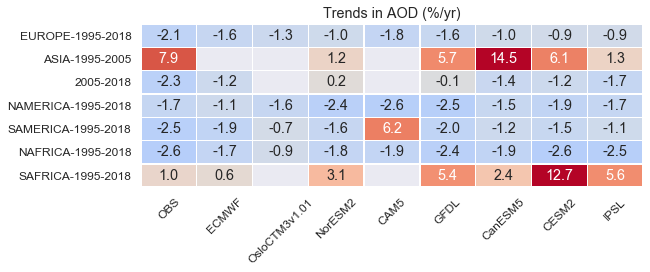

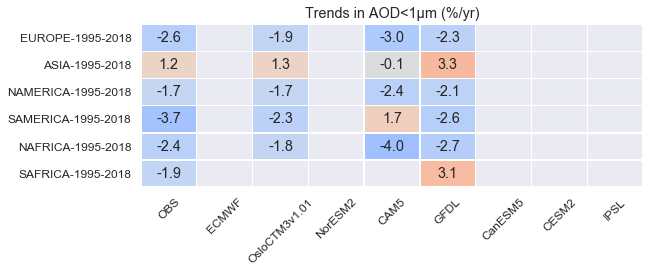

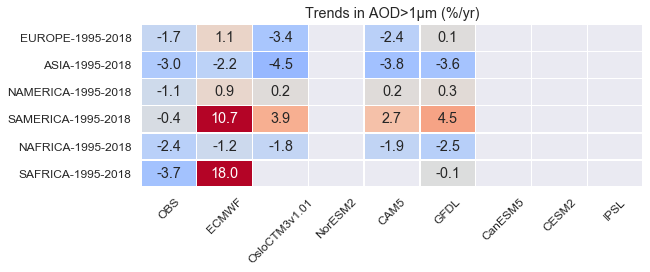

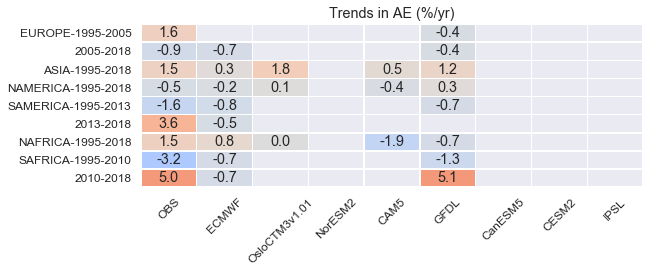

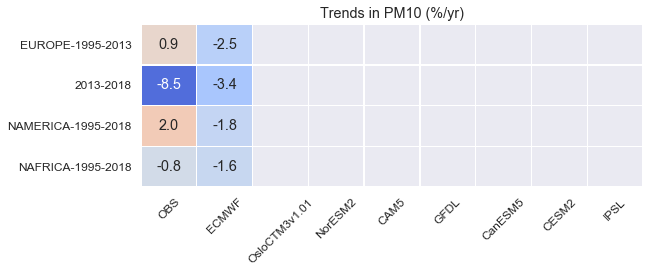

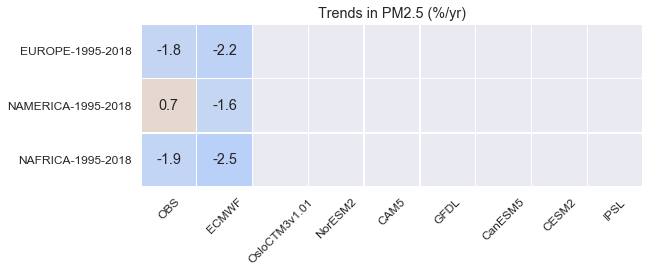

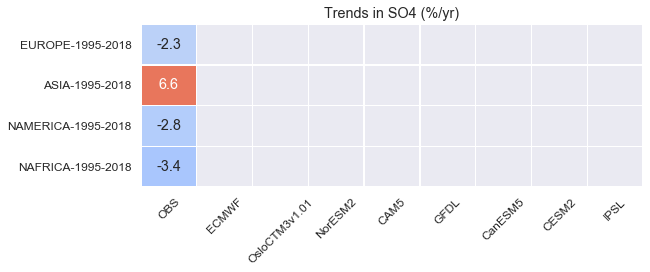

In [6]:
parameters = ['AOD', 'AOD<1µm', 'AOD>1µm', 'AE', 'PM10', 'PM2.5', 'SO4']
for parameter in parameters:
    df = RSLP[RSLP.index.get_level_values(0)==parameter]
    #remove Paramneter from multiIndex
    df = df.droplevel(level=0)
    #generate a heatmap
    plt.figure(figsize=(9,3))

    hm = sns.heatmap(df, vmin=-10, vmax=10, center=0, cmap='coolwarm', 
                annot=True, fmt=".1f", linewidth=0.5, cbar=False,
                square=False
               )
    plt.title('Trends in '+parameter+' (%/yr)')
    
    #fix xlabels
    xlabs = hm.get_xticklabels()
    for i, xlab in enumerate(xlabs):
        xl = xlab.get_text()
        xl = xl.split('_')[0]
        xl = xl.split('-')[0]
        xlabs[i].set_text(xl)
    hm.set_xticklabels(xlabs, rotation = 45, fontsize = 12)
    
    #fix ylabels: remove the region in second line
    ylabs = hm.get_yticklabels()
    for i, ylab in enumerate(ylabs):
        yl = ylab.get_text()
        reg = yl.split('-')[0]
        if i>0 and reg == prev_reg:
            yl = yl.split('-')[1]+'-'+yl.split('-')[2]
        prev_reg = reg
        ylabs[i].set_text(yl)
    hm.set_yticklabels(ylabs, rotation = 0, fontsize = 12)
    
    #remove ylabel
    hm.set_ylabel('')

In [7]:
def pval2size(pv):
    if np.isnan(pv):
        size = 0
    else:
        if pv<=0.1:
            size = 8
        if pv>0.1 and pv<=0.5:
            size = 6
        if pv>0.1 and pv<=0.2:
            size = 5
        if pv>0.2 and pv<=0.3:
            size = 4
        if pv>0.3 and pv<=0.5:
            size = 3
        if pv>0.5:
            size = 1
    return size

In [1]:
def heatmap(x, y, **kwargs):
    if 'color' in kwargs:
        color = kwargs['color']
    else:
        color = [1]*len(x)

    if 'palette' in kwargs:
        palette = kwargs['palette']
        n_colors = len(palette)
    else:
        n_colors = 256 # Use 256 colors for the diverging color palette
        palette = sns.color_palette("Blues", n_colors) 

    if 'color_range' in kwargs:
        color_min, color_max = kwargs['color_range']
    else:
        color_min, color_max = min(color), max(color) # Range of values that will be mapped to the palette, i.e. min and max possible correlation

    def value_to_color(val):
        if color_min == color_max:
            return palette[-1]
        else:
            val_position = float((val - color_min)) / (color_max-1 - color_min) # position of value in the input range, relative to the length of the input range
            val_position = min(max(val_position, 0), 1) # bound the position betwen 0 and 1
            ind = int(val_position * (n_colors - 1)) # target index in the color palette
            return palette[ind]

    if 'size' in kwargs:
        size = kwargs['size']
    else:
        size = [1]*len(x)

    if 'size_range' in kwargs:
        size_min, size_max = kwargs['size_range'][0], kwargs['size_range'][1]
    else:
        size_min, size_max = min(size), max(size)

    size_scale = kwargs.get('size_scale', 500)

    def value_to_size(val):
        if size_min == size_max:
            return 1 * size_scale
        else:
            val_position = (val - size_min) * 0.99 / (size_max - size_min) + 0.01 # position of value in the input range, relative to the length of the input range
            val_position = min(max(val_position, 0), 1) # bound the position betwen 0 and 1
            return val_position * size_scale
    if 'x_order' in kwargs: 
        x_names = [t for t in kwargs['x_order']]
    else:
        x_names = [t for t in sorted(set([v for v in x]))]
    x_to_num = {p[1]:p[0] for p in enumerate(x_names)}

    if 'y_order' in kwargs: 
        y_names = [t for t in kwargs['y_order']]
    else:
        y_names = [t for t in sorted(set([v for v in y]))]
    y_to_num = {p[1]:p[0] for p in enumerate(y_names)}

    #new figure
    plt.figure(figsize=(9,3))
    
    plot_grid = plt.GridSpec(1, 14+3, hspace=0.2, wspace=0.1) # Setup a 1x10 grid
    ax = plt.subplot(plot_grid[:,:-3]) # Use the left 14/15ths of the grid for the main plot

    marker = kwargs.get('marker', 's')

    kwargs_pass_on = {k:v for k,v in kwargs.items() if k not in [
         'color', 'palette', 'color_range', 'size', 'size_range', 'size_scale', 'marker', 
         'x_order', 'y_order', 'annotate', 'fontsize', 'colorbar', 'title', 'merge_ylabels', 'x_ylabels'
    ]}

    ax.scatter(
        x=[x_to_num[v] for v in x],
        y=[y_to_num[v] for v in y],
        marker=marker,
        s=[value_to_size(v) for v in size], 
        c=[value_to_color(v) for v in color],
        **kwargs_pass_on
    )
    
    if kwargs['annotate']:
        for i, annotation in enumerate(color):
            if annotation!=0:
                note = '{:+3.1f}'.format(annotation)
                fc = 'black'
                fs = 10
                txt = ax.text(x_to_num[x[i]]-.025, y_to_num[y[i]], note, fontsize=fs, zorder=10,
                       verticalalignment='center', horizontalalignment='center', color=fc)
                txt.set_path_effects([PathEffects.withStroke(linewidth=2, foreground='w')])
         
    ax.set_xticks([v for k,v in x_to_num.items()])
    ax.set_xticklabels([k for k in x_to_num], rotation=45, horizontalalignment='right')
    ax.set_yticks([v for k,v in y_to_num.items()])
    ax.set_yticklabels([k for k in y_to_num])

    ax.grid(False, 'major')
    ax.grid(True, 'minor')
    ax.set_xticks([t + 0.5 for t in ax.get_xticks()], minor=True)
    ax.set_yticks([t + 0.5 for t in ax.get_yticks()], minor=True)

    ax.set_xlim([-0.5, max([v for v in x_to_num.values()]) + 0.5])
    ax.set_ylim([-0.5, max([v for v in y_to_num.values()]) + 0.5])
    ax.set_facecolor('#F1F1F1')
    

    # Add color legend on the right side of the plot
    if color_min < color_max:
        if kwargs['colorbar']:
            ax = plt.subplot(plot_grid[:,-1:]) # Use the rightmost column of the plot
            #plot pvalues
            for i, pval in enumerate([0.5,0.3,0.2,0]):
                ms = pval2size(pval)
                msize = ms*2.5
                plt.plot(1.0,0.8*i+0.3,'o', markersize=msize, color='black', mfc='none')
                if i==3:
                    txt = '< 0.1'
                if i==2:
                    txt = '< 0.2'
                if i==1:
                    txt = '< 0.4'
                if i==0:
                    txt = '> 0.5'
                plt.text(2.1,0.8*i+0.2, txt, transform=ax.transData, fontsize=13)
            ax.set_ylim([-1,4])
            ax.set_xlim([0,2])
            ax.axes.get_yaxis().set_visible(False)
            ax.axes.get_xaxis().set_visible(False)
            ax.set_facecolor('white')
            plt.title('p-val',x=1.15,y=0.8)
            ax.margins(0)
            
            
            ax = plt.subplot(plot_grid[:,-3:-2]) # Use the rightmost column of the plot
            col_x = [1.5]*len(palette) # Fixed x coordinate for the bars
            bar_y=np.linspace(color_min, color_max, n_colors) # y coordinates for each of the n_colors bars

            bar_height = bar_y[1] - bar_y[0]
            ax.barh(
                y=bar_y,
                width=[1.5]*len(palette), # Make bars 5 units wide
                left=col_x, # Make bars start at 0
                height=bar_height,
                color=palette,
                linewidth=0
            )
            ax.set_xlim(1, 2) # Bars are going from 0 to 5, so lets crop the plot somewhere in the middle
            ax.grid(False) # Hide grid
            ax.set_facecolor('white') # Make background white
            ax.set_xticks([]) # Remove horizontal ticks
            ax.set_yticks(np.linspace(min(bar_y), max(bar_y), 3)) # Show vertical ticks for min, middle and max
            ax.yaxis.tick_right() # Show vertical ticks on the right
            ax.tick_params(length=0,pad=3,grid_alpha=0,grid_zorder=0)
            plt.title('%/yr',x=1.0,y=0.8)
            ax.margins(0.4)
            plt.draw()
            #add a + sign to positive trends
            ylabs = ax.get_yticklabels()
            for i, ylab in enumerate(ylabs):
                yl = ylab.get_text()
                if yl[0]!='−' and yl[0]!='0':
                    yl='+'+yl
                ylabs[i].set_text(yl)
            ax.set_yticklabels(ylabs)
             
    if kwargs['title']:
        ax = plt.subplot(plot_grid[:,:-3]) # Use the left 14/15ths of the grid for the main plot
        plt.title(kwargs['title'])

#### heatmaps for OBS and MODS per variable

In [2]:
parameters = ['AOD', 'AOD<1µm', 'AOD>1µm', 'AE', 'PM10', 'PM2.5', 'SO4']
#parameters = ['AOD']

for parameter in parameters:
    rslp = RSLP[RSLP.index.get_level_values(0)==parameter]
    pval = PVAL[PVAL.index.get_level_values(0)==parameter]

    #store rows order: index
    rows = [i[1]+'-'+i[2] for i in rslp.index]

    #remove Indexes so only have columns
    rslp = rslp.reset_index()
    pval = pval.reset_index()
    
    xs, ys, rslps, pvals = [], [], [], []

    #start extracting rlsps values
    vals = rslp.values
    columns = rslp.columns
    for val in vals:
        reg = val[1]
        seg = val[2]
        data = val[3:]

        rslps.extend(data[:])
        xs.extend(columns[3:])
        ys.extend([reg+'-'+seg] * len(data))
    rslps = np.array(rslps)

    #then pval values
    vals = pval.values
    for val in vals:
        data = val[3:]
        pvals.extend(data[:])
    pvals = np.array(pvals)

    #sizes matrice: opposite to pvalue
    sizes = []
    for i, pv in enumerate(pvals):
        if np.isnan(rslps[i]):
            size = 0
        else:
            size = pval2size(pv)
        sizes.append(size)
                    
    #if nan rslp, set it to 99
    rslps[np.isnan(rslps)]=0
    
    #plt.figure(figsize=(9,3))
    heatmap(
        x=xs,
        y=ys,
        size=sizes,
        color=rslps,
        marker='o',
        palette=sns.color_palette("coolwarm", 8),
        color_range=[-10,10],
        x_order=cols,
        y_order=rows[::-1],
        title=parameter,
        annotate=True,
        colorbar=True
    )

    ax = plt.gca()

    #fix xlabels
    xlabs = ax.get_xticklabels()
    for i, xlab in enumerate(xlabs):
        xl = xlab.get_text()
        xl = xl.split('_')[0]
        xl = xl.split('-')[0]
        xlabs[i].set_text(xl)
    ax.set_xticklabels(xlabs, rotation = 45, fontsize = 12)

    #fix ylabels: remove the region in second line
    '''ylabs = ax.get_yticklabels()
    for i, ylab in enumerate(ylabs):
        yl = ylab.get_text()
        reg = yl.split('-')[0]
        if i>0:
            if reg == prev_reg:
                yl = yl.split('-')[1]+'-'+yl.split('-')[2]
        prev_reg = reg
        print(yl)
        ylabs[i].set_text(yl)
    ax.set_yticklabels(ylabs, rotation = 0, fontsize = 12)'''

    #change size of the figure
    fig = plt.gcf()
    fig.set_size_inches(8, 4)
    #fig.savefig('test2png.png', dpi=100)
    plt.savefig('figs/heatmaps/' + parameter + '.png', dpi=300, bbox_inches='tight')

NameError: name 'RSLP' is not defined